<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

IMDB Movie Dataset Analysis
</p>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

In [4]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [5]:
movies = pd.read_csv('./movielens/movies.csv')
movies.genres = movies.genres.str.split('|')
movies = explode(movies, ['genres'])
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,1,Toy Story (1995),Animation
2,1,Toy Story (1995),Children
3,1,Toy Story (1995),Comedy
4,1,Toy Story (1995),Fantasy


In [6]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand = True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
1,1,Toy Story (1995),Animation,1995
2,1,Toy Story (1995),Children,1995
3,1,Toy Story (1995),Comedy,1995
4,1,Toy Story (1995),Fantasy,1995


In [7]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

In [8]:
movies.shape

(54406, 4)

In [9]:
#is any row NULL ?
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

movies.dropna().head()

In [10]:
movies.dtypes

movieId      int64
title       object
genres      object
year       float64
dtype: object

In [11]:
movies['genres'].value_counts()

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: genres, dtype: int64

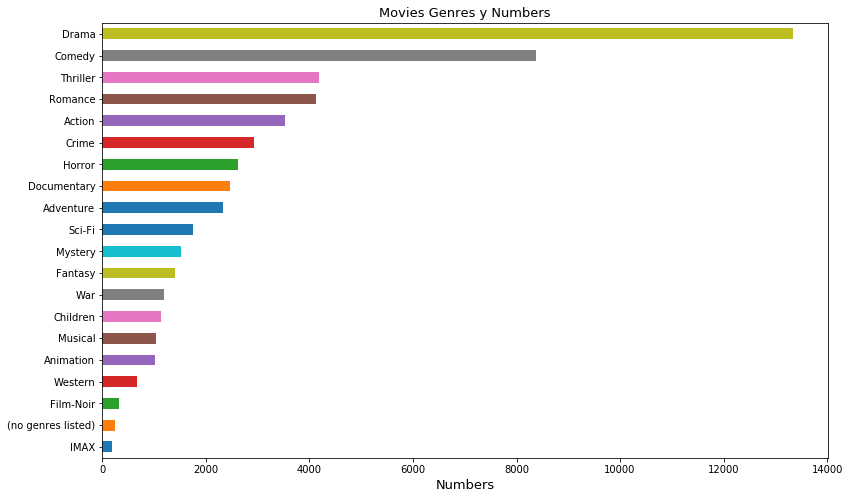

In [12]:
plt.figure(figsize =(13,8))
genres_count = movies['genres'].value_counts()
genres_count_sort = genres_count.sort_values(ascending=True)
genres_count_sort.plot.barh()  
plt.title('Movies Genres y Numbers',fontsize=13)
plt.xlabel('Numbers',fontsize=13)
plt.show()

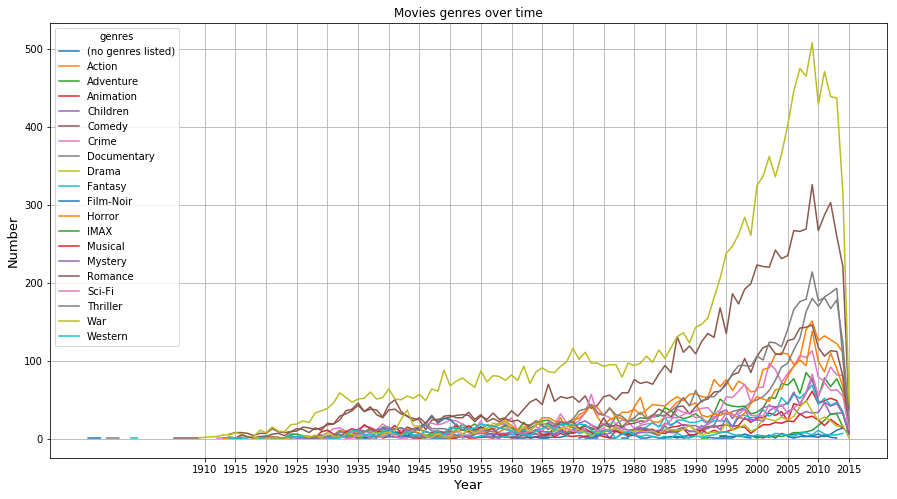

In [13]:
movies.groupby(['genres','year'])['genres'].count().unstack('genres').plot(figsize=(15,8))
plt.title('Movies genres over time')
plt.xticks(range(1910,2016,5))
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number',fontsize=13)
plt.grid(True)

In [14]:
del ratings['userId']

In [15]:
del ratings['timestamp']

In [16]:
del movies['title']

In [17]:
ratings =ratings.merge(movies, on='movieId', how='inner')
ratings.head()

,movieId,rating,genres,year
0,2,3.5,Adventure,1995.0
1,2,3.5,Children,1995.0
2,2,3.5,Fantasy,1995.0
3,2,3.0,Adventure,1995.0
4,2,3.0,Children,1995.0


Text(0,0.5,'Average Rating')

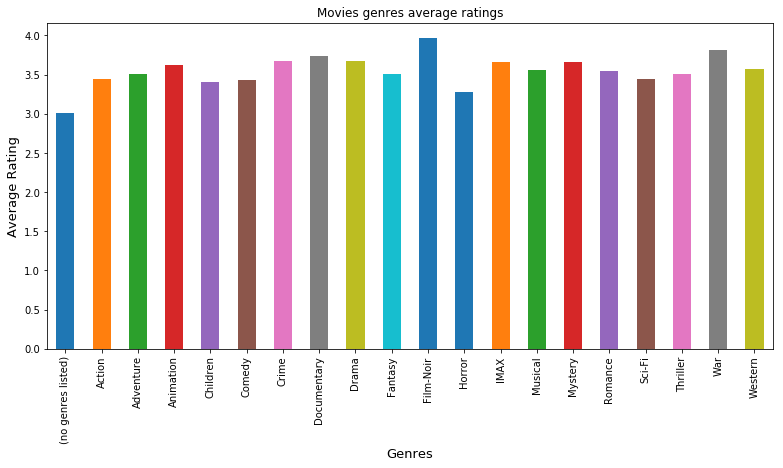

In [18]:
ratings.groupby(['genres'])['rating'].mean().plot(kind='bar',figsize=(13,6))
plt.title('Movies genres average ratings')
plt.xlabel('Genres',fontsize=13)
plt.ylabel('Average Rating',fontsize=13) 